<a href="https://colab.research.google.com/github/thaisflopes/mestrado_PPGA_UnB/blob/main/correlacao/correlacao_reclamacoes_judicializacao_vfinal_Spearman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código do trabalho de mestrado da aluna Thaís Ferreira Lopes Oliveira no PPGA-UnB.

### Importando bibliotecas

In [ ]:
#Importando bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
import os

### Importando os dados

In [ ]:
#Baixando a base de dados de Reclamações
reclamacoes = pd.read_csv('base_reclamacoes_ajustada.csv')
reclamacoes.shape

(316799, 18)

In [ ]:
#Visualizando os tipos de dados de Reclamações
reclamacoes.dtypes

Gestor                         object
Região                         object
UF                             object
Ano Abertura                    int64
Mês Abertura                    int64
Tempo Resposta (em dias)      float64
Forma Contrato                 object
Procurou Empresa               object
Respondida                     object
Situação                       object
Avaliação Reclamação           object
Nota do Consumidor            float64
empresa_aerea                  object
codigo_anac                    object
obj_problemas_operacionais       bool
obj_bagagem                      bool
obj_contrato                     bool
obj_outros                       bool
dtype: object

In [ ]:
#Baixando a base de dados de Judicialização
judicializacao = pd.read_csv('dados_judicializacao_AED.csv')
judicializacao.shape

(555546, 31)

In [ ]:
#Visualizando os tipos de dados de Judicialização
judicializacao.dtypes

empresa_re                       object
num_proc_ano                      int64
data_distribuicao                object
UF                               object
operacao                         object
jurisdicao                       object
instancia                        object
situacao_processual_sentenca     object
n_autores                         int64
data_voo                         object
valor_pedido_inicial            float64
valor_dano_moral                float64
valor_dano_material             float64
valor_total_condenacao          float64
valor_pago                      float64
obj_problemas_operacionais         bool
obj_bagagem                        bool
obj_contrato                       bool
obj_outros                         bool
causa_nao_informado                bool
causa_forca_maior                  bool
causa_fortuitos                    bool
causa_terceiros                    bool
causa_cliente                      bool
causa_aerea                        bool


### Selecionando colunas

Colunas que serão usadas:
- Região
- Ano
- Mês
- Empresa
- Objetos

#### Reclamações

In [ ]:
reclamacoes.columns

Index(['Gestor', 'Região', 'UF', 'Ano Abertura', 'Mês Abertura',
       'Tempo Resposta (em dias)', 'Forma Contrato', 'Procurou Empresa',
       'Respondida', 'Situação', 'Avaliação Reclamação', 'Nota do Consumidor',
       'empresa_aerea', 'codigo_anac', 'obj_problemas_operacionais',
       'obj_bagagem', 'obj_contrato', 'obj_outros'],
      dtype='object')

In [ ]:
#Excluindo as colunas que não serão usadas da base de dados de Reclamações
reclamacoes = reclamacoes.drop(['Gestor', 'UF', 'Tempo Resposta (em dias)', 'Forma Contrato', 'Procurou Empresa',
       'Respondida', 'Situação', 'Avaliação Reclamação', 'Nota do Consumidor', 'codigo_anac'], axis=1)

In [ ]:
#Renomeando os nomes das colunas da base de dados de Reclamações
reclamacoes = reclamacoes.rename(columns={'Ano Abertura': 'ano', 'Mês Abertura': 'mes', 'Região': 'regiao'})

In [ ]:
#Colunas finais da base de dados de Reclamações
reclamacoes.columns

Index(['regiao', 'ano', 'mes', 'empresa_aerea', 'obj_problemas_operacionais',
       'obj_bagagem', 'obj_contrato', 'obj_outros'],
      dtype='object')

#### Judicialização

In [ ]:
judicializacao.columns

Index(['empresa_re', 'num_proc_ano', 'data_distribuicao', 'UF', 'operacao',
       'jurisdicao', 'instancia', 'situacao_processual_sentenca', 'n_autores',
       'data_voo', 'valor_pedido_inicial', 'valor_dano_moral',
       'valor_dano_material', 'valor_total_condenacao', 'valor_pago',
       'obj_problemas_operacionais', 'obj_bagagem', 'obj_contrato',
       'obj_outros', 'causa_nao_informado', 'causa_forca_maior',
       'causa_fortuitos', 'causa_terceiros', 'causa_cliente', 'causa_aerea',
       'causa_outros', 'obj_principal', 'subobj_principal', 'causa_alegada',
       'mes_distribuicao', 'regiao'],
      dtype='object')

In [ ]:
#Excluindo as colunas que não serão usadas da base de dados de Judicialização
judicializacao = judicializacao.drop(['data_distribuicao', 'UF', 'operacao',
       'jurisdicao', 'instancia', 'situacao_processual_sentenca', 'n_autores',
       'valor_pedido_inicial', 'valor_dano_moral', 'valor_dano_material',
       'valor_total_condenacao', 'valor_pago', 'causa_nao_informado',
       'causa_forca_maior', 'causa_fortuitos', 'causa_terceiros',
       'causa_cliente', 'causa_aerea', 'causa_outros', 'obj_principal',
       'subobj_principal', 'causa_alegada'], axis=1)

In [ ]:
#Renomeando os nomes das colunas da base de dados de Judicialização
judicializacao = judicializacao.rename(columns={'num_proc_ano': 'ano', 'mes_distribuicao':'mes', 'empresa_re': 'empresa_aerea'})

In [ ]:
#Colunas finais da base de dados de Judicialização
judicializacao.columns

Index(['empresa_aerea', 'ano', 'data_voo', 'obj_problemas_operacionais',
       'obj_bagagem', 'obj_contrato', 'obj_outros', 'mes', 'regiao'],
      dtype='object')

### Calculando a quantidade de reclamações e processos judiciais

In [ ]:
# Agrupar pela regiao, UF, ano, mes e empresa_aerea e contar a quantidade de reclamacoes
agrupado_reclamacoes = reclamacoes.groupby(['regiao', 'ano', 'mes', 'empresa_aerea']).agg(
    qtd_reclamacoes=('empresa_aerea', 'count'),
    reclamacoes_obj_problemas_operacionais=('obj_problemas_operacionais', 'sum'),
    reclamacoes_obj_bagagem=('obj_bagagem', 'sum'),
    reclamacoes_obj_contrato=('obj_contrato', 'sum'),
    reclamacoes_obj_outros=('obj_outros', 'sum')
).reset_index()

# Exibir o DataFrame agrupado e contado
agrupado_reclamacoes.head()

,regiao,ano,mes,empresa_aerea,qtd_reclamacoes,reclamacoes_obj_problemas_operacionais,reclamacoes_obj_bagagem,reclamacoes_obj_contrato,reclamacoes_obj_outros
0,CO,2019,1,Azul,41,8,3,30,0
1,CO,2019,1,Copa,1,0,0,1,0
2,CO,2019,1,Gol,128,55,18,56,2
3,CO,2019,1,Latam,207,47,24,144,2
4,CO,2019,1,United,1,0,0,1,0


In [ ]:
#Qtd total de reclamações
agrupado_reclamacoes['qtd_reclamacoes'].sum()

316799

In [ ]:
# Agrupar pela regiao, mes, ano, empresa_aerea e contar a quantidade de processos judiciais
agrupado_judicializacao = judicializacao.groupby(['regiao', 'ano', 'mes', 'empresa_aerea']).agg(
    qtd_processos=('empresa_aerea', 'count'),
    processos_obj_problemas_operacionais=('obj_problemas_operacionais', 'sum'),
    processos_obj_bagagem=('obj_bagagem', 'sum'),
    processos_obj_contrato=('obj_contrato', 'sum'),
    processos_obj_outros=('obj_outros', 'sum')
).reset_index()

# Exibir o DataFrame agrupado e contado
agrupado_judicializacao.head()

,regiao,ano,mes,empresa_aerea,qtd_processos,processos_obj_problemas_operacionais,processos_obj_bagagem,processos_obj_contrato,processos_obj_outros
0,CO,2019,0,Azul,1,0,0,0,1
1,CO,2019,0,Latam,4,3,0,1,0
2,CO,2019,1,Azul,155,133,19,17,0
3,CO,2019,1,Copa,12,10,0,1,1
4,CO,2019,1,Gol,107,90,14,12,0


In [ ]:
#Qtd total de processos judiciais
agrupado_judicializacao['qtd_processos'].sum()

555546

In [ ]:
# Mesclar os dois DataFrames com base nas colunas de agrupamento
df_combinado = pd.merge(
    agrupado_reclamacoes,
    agrupado_judicializacao,
    on=['regiao', 'ano', 'mes', 'empresa_aerea']
)

df_combinado.head()

,regiao,ano,mes,empresa_aerea,qtd_reclamacoes,reclamacoes_obj_problemas_operacionais,reclamacoes_obj_bagagem,reclamacoes_obj_contrato,reclamacoes_obj_outros,qtd_processos,processos_obj_problemas_operacionais,processos_obj_bagagem,processos_obj_contrato,processos_obj_outros
0,CO,2019,1,Azul,41,8,3,30,0,155,133,19,17,0
1,CO,2019,1,Copa,1,0,0,1,0,12,10,0,1,1
2,CO,2019,1,Gol,128,55,18,56,2,107,90,14,12,0
3,CO,2019,1,Latam,207,47,24,144,2,421,317,47,56,6
4,CO,2019,1,United,1,0,0,1,0,4,4,0,0,0


In [ ]:
df_combinado.columns

Index(['regiao', 'ano', 'mes', 'empresa_aerea', 'qtd_reclamacoes',
       'reclamacoes_obj_problemas_operacionais', 'reclamacoes_obj_bagagem',
       'reclamacoes_obj_contrato', 'reclamacoes_obj_outros', 'qtd_processos',
       'processos_obj_problemas_operacionais', 'processos_obj_bagagem',
       'processos_obj_contrato', 'processos_obj_outros'],
      dtype='object')

In [ ]:
df_combinado.shape

(1638, 14)

### Normalidade

In [ ]:
# Criar lista para armazenar os resultados
resultados_shapiro = []

# Iterar sobre todas as colunas numéricas do DataFrame
for coluna in df_combinado.select_dtypes(include=['number']).columns:
    dados = df_combinado[coluna].dropna()  # Removendo valores NaN

    # Verificar se há dados suficientes para o teste
    if len(dados) < 3:
        print(f'Coluna: {coluna} | Dados insuficientes para o teste de Shapiro-Wilk.\n')
        continue  # Pula para a próxima coluna

    stat, p = shapiro(dados)  # Aplicar o teste de Shapiro-Wilk

    # Determinar se os dados seguem distribuição normal
    normalidade = "Sim" if p > 0.05 else "Não"

    # Armazenar resultado na lista
    resultados_shapiro.append([coluna, stat, p, normalidade])

    # Exibir resultado
    print(f'Coluna: {coluna} | Estatística: {stat:.4f} | p-valor: {p:.4f}')
    print(f'  -> Os dados seguem uma distribuição normal? {normalidade}\n')

# Converter lista em DataFrame para análise futura
df_resultados_shapiro = pd.DataFrame(resultados_shapiro, columns=['Coluna', 'Estatística', 'p-valor', 'Normalidade'])

# Salvar o DataFrame em um arquivo Excel
df_resultados_shapiro.to_excel("resultados_shapiro.xlsx", index=False)

# Exibir os primeiros resultados
df_resultados_shapiro

Coluna: ano | Estatística: 0.8902 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: mes | Estatística: 0.9421 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: qtd_reclamacoes | Estatística: 0.6281 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: reclamacoes_obj_problemas_operacionais | Estatística: 0.6283 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: reclamacoes_obj_bagagem | Estatística: 0.6068 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: reclamacoes_obj_contrato | Estatística: 0.5796 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: reclamacoes_obj_outros | Estatística: 0.5262 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: qtd_processos | Estatística: 0.7504 | p-valor: 0.0000
  -> Os dados seguem uma distribuição normal? Não

Coluna: processos_obj_problemas_operacionais | Estatística:

,Coluna,Estatística,p-valor,Normalidade
0,ano,0.890198,1.277659e-32,Não
1,mes,0.942097,8.075842e-25,Não
2,qtd_reclamacoes,0.628051,1.292562e-50,Não
3,reclamacoes_obj_problemas_operacionais,0.628347,1.331997e-50,Não
4,reclamacoes_obj_bagagem,0.606808,1.565522e-51,Não
5,reclamacoes_obj_contrato,0.579650,1.204974e-52,Não
6,reclamacoes_obj_outros,0.526207,1.133831e-54,Não
7,qtd_processos,0.750404,2.792975e-44,Não
8,processos_obj_problemas_operacionais,0.731562,2.104223e-45,Não
9,processos_obj_bagagem,0.617550,4.497257e-51,Não


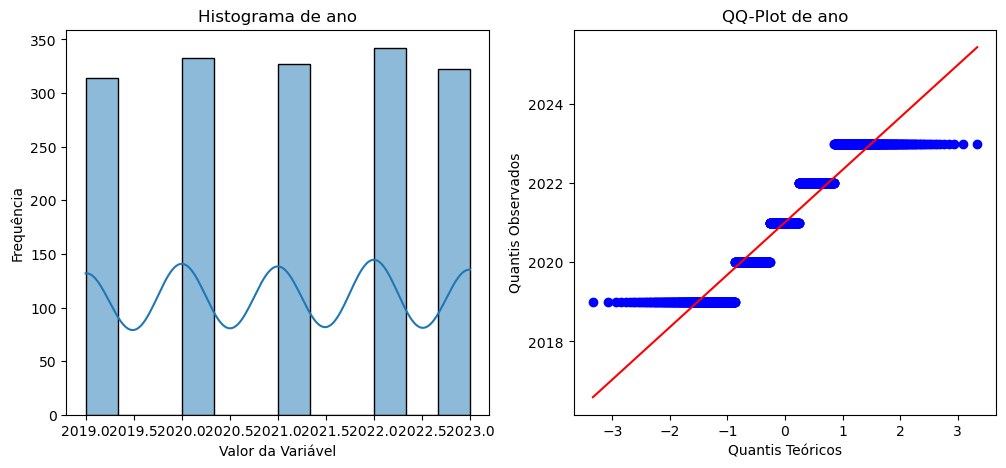

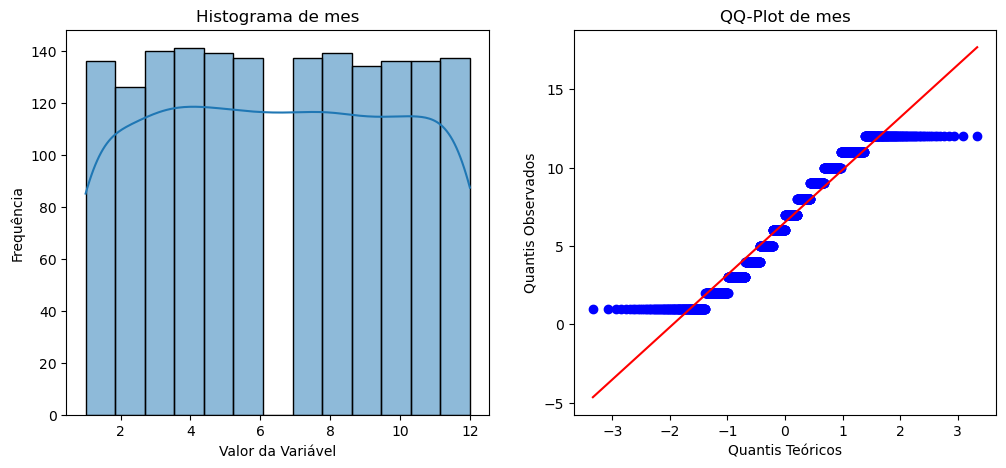

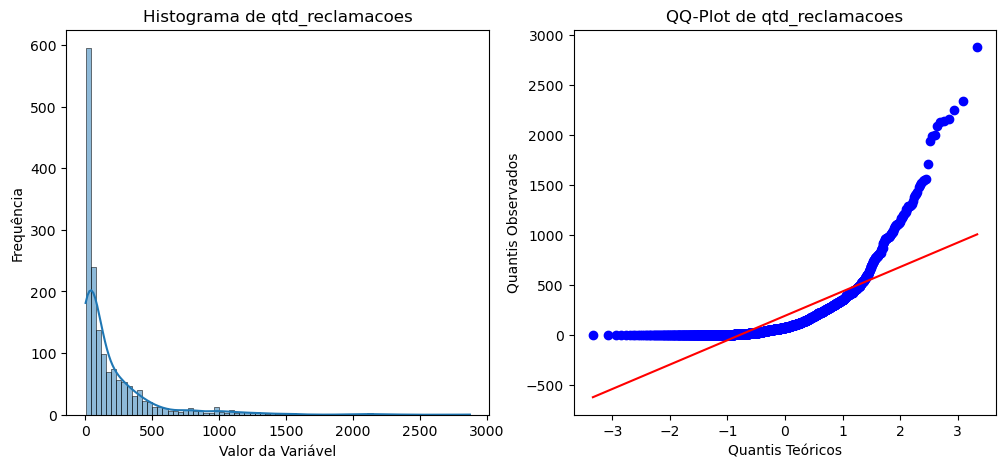

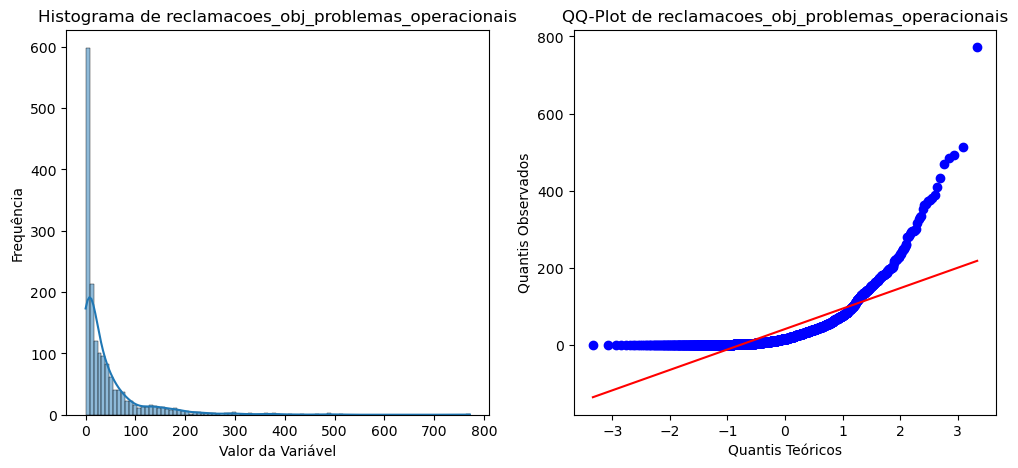

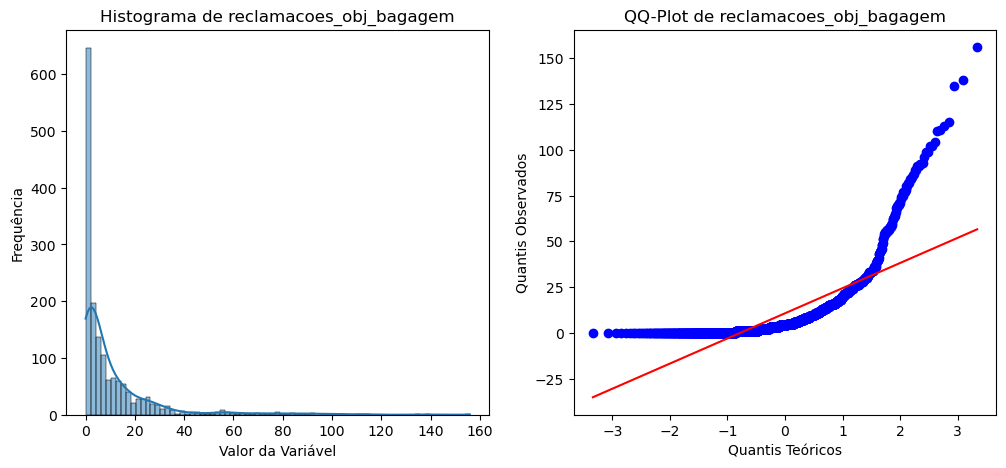

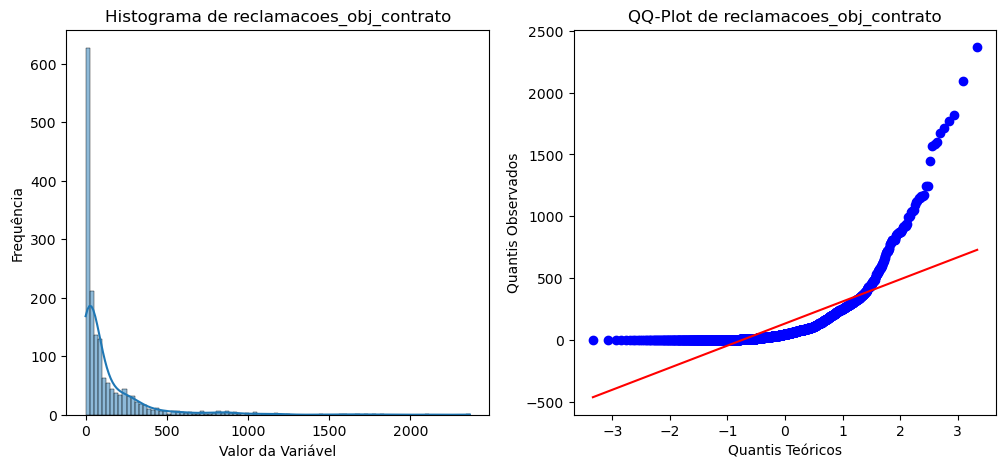

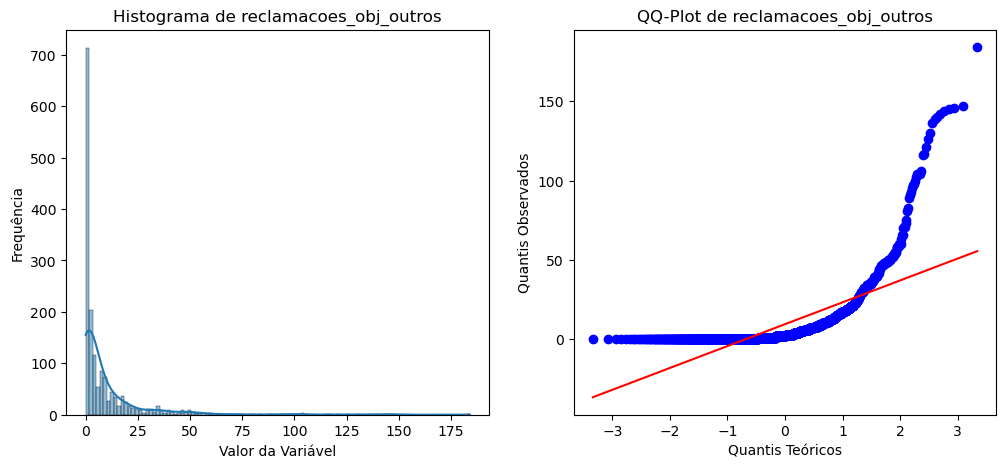

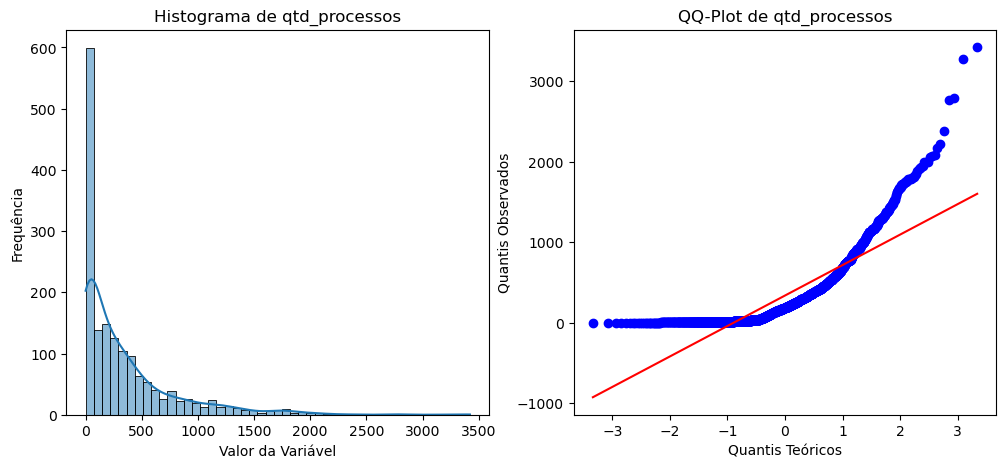

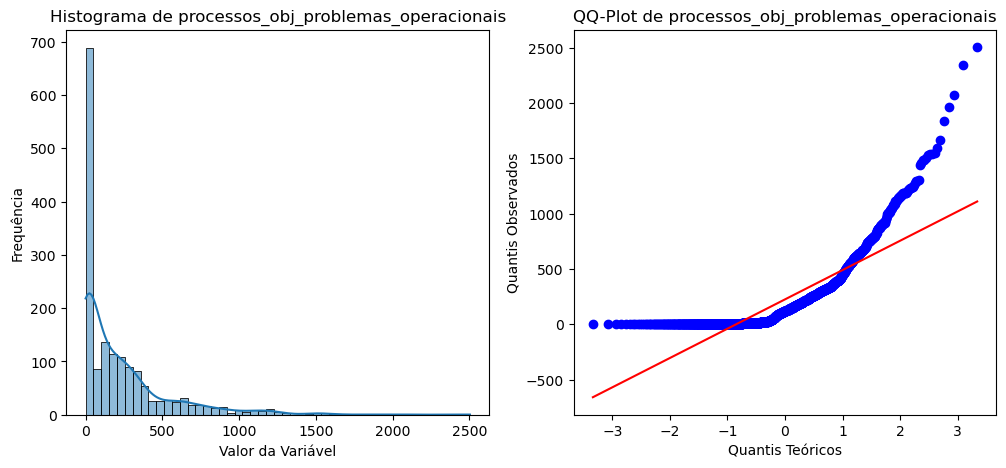

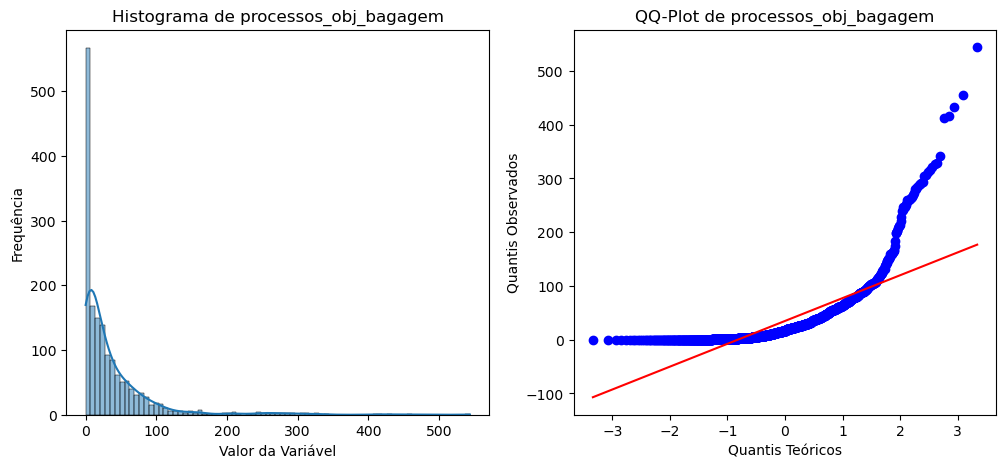

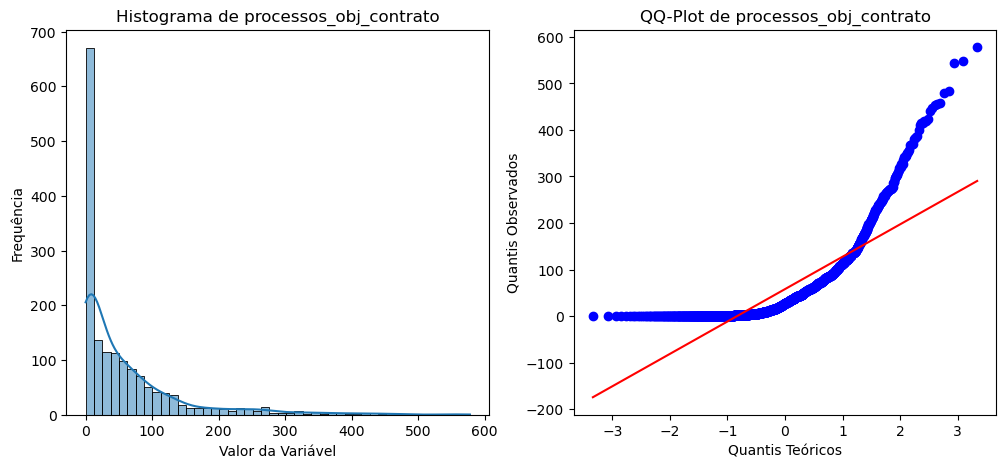

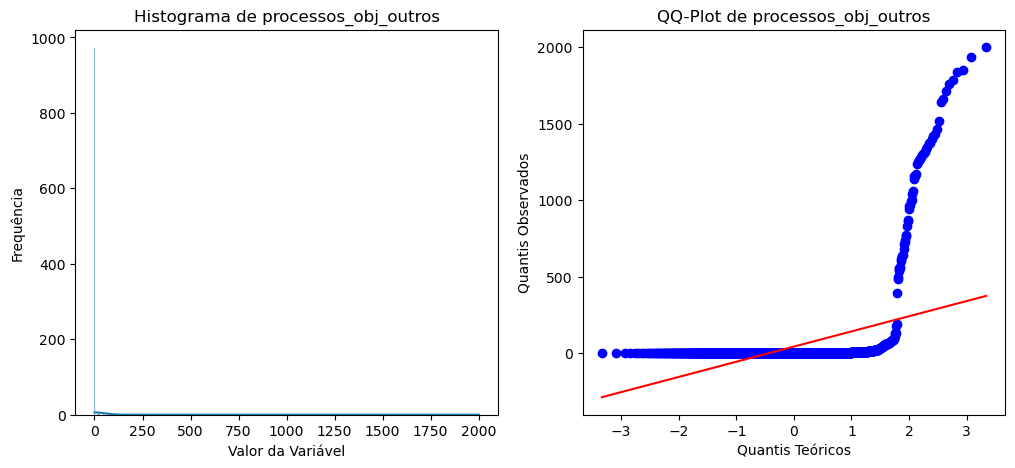

In [ ]:
# Criar diretório para salvar os gráficos
output_dir = "graficos"
os.makedirs(output_dir, exist_ok=True)

for coluna in df_combinado.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_combinado[coluna], kde=True)
    plt.xlabel("Valor da Variável")  # Nome do eixo X
    plt.ylabel("Frequência")  # Nome do eixo Y
    plt.title(f'Histograma de {coluna}')

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df_combinado[coluna], dist="norm", plot=plt)
    plt.xlabel("Quantis Teóricos")  # Nome do eixo X
    plt.ylabel("Quantis Observados")  # Nome do eixo Y
    plt.title(f'QQ-Plot de {coluna}')

    # Salvar gráfico
    plt.savefig(f"{output_dir}/{coluna}.png", dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
colunas = [
    'reclamacoes_obj_problemas_operacionais', 'reclamacoes_obj_bagagem',
    'reclamacoes_obj_contrato', 'reclamacoes_obj_outros',
    'processos_obj_problemas_operacionais', 'processos_obj_bagagem',
    'processos_obj_contrato', 'processos_obj_outros'
]

# Proporção de zeros em cada coluna
proporcao_zeros = df_combinado[colunas].apply(lambda col: (col == 0).sum() / 1638)
print(proporcao_zeros)

reclamacoes_obj_problemas_operacionais    0.104396
reclamacoes_obj_bagagem                   0.195971
reclamacoes_obj_contrato                  0.032967
reclamacoes_obj_outros                    0.318681
processos_obj_problemas_operacionais      0.094628
processos_obj_bagagem                     0.102564
processos_obj_contrato                    0.128205
processos_obj_outros                      0.593407
dtype: float64


### Correlação de Spearman

In [ ]:
# Calcular a correlação entre as quantidades dos objetos (judicializacao vs reclamacoes)
correlacao_spearman = df_combinado[
    ['reclamacoes_obj_problemas_operacionais', 'reclamacoes_obj_bagagem', 'reclamacoes_obj_contrato', 'reclamacoes_obj_outros',
    'processos_obj_problemas_operacionais', 'processos_obj_bagagem', 'processos_obj_contrato', 'processos_obj_outros']
].corr(method='spearman')

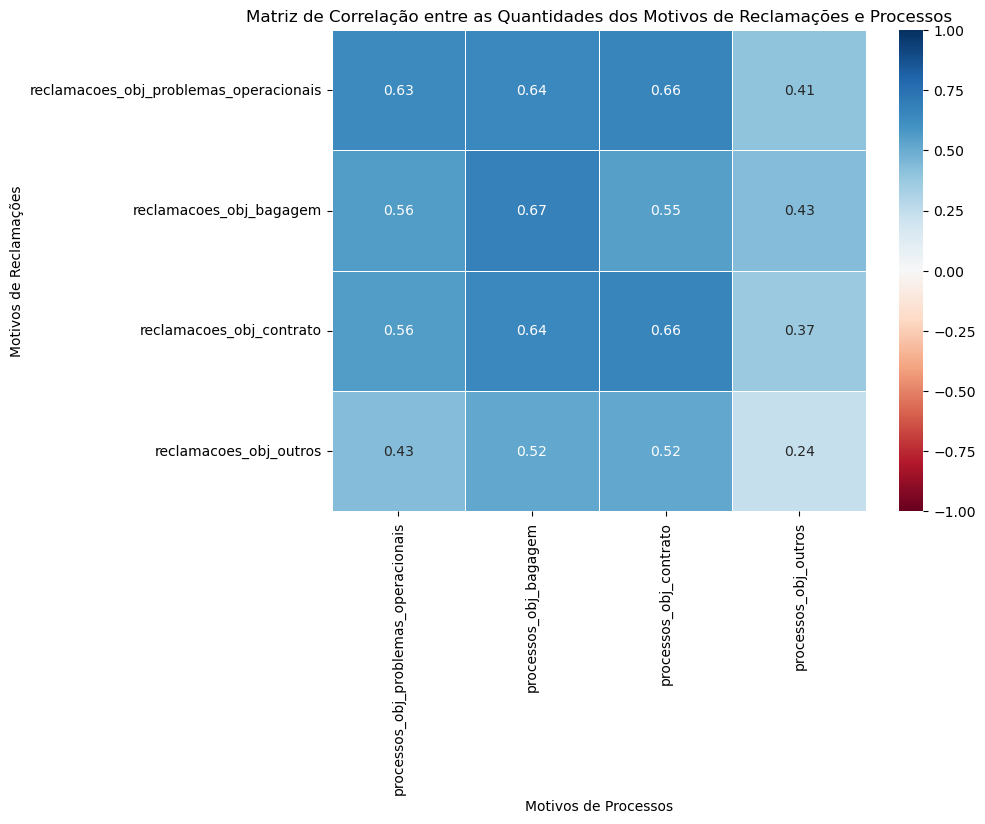

In [ ]:
# Filtrar para deixar apenas as linhas de reclamações e as colunas de processos
correlacao_reclamacao_processo_spearman = correlacao_spearman.loc[
    ['reclamacoes_obj_problemas_operacionais', 'reclamacoes_obj_bagagem', 'reclamacoes_obj_contrato', 'reclamacoes_obj_outros'],
    ['processos_obj_problemas_operacionais', 'processos_obj_bagagem', 'processos_obj_contrato', 'processos_obj_outros']
]

# Criar o gráfico de mapa de calor (heatmap)
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlacao_reclamacao_processo_spearman, annot=True, cmap='RdBu', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

# Ajustar layout para não cortar rótulos
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("correlacao_reclamacao_processo_spearman.png", format="png", dpi=300)

# Adicionar rótulos aos eixos
plt.xlabel("Motivos de Processos")
plt.ylabel("Motivos de Reclamações")

# Exibir o gráfico
plt.title("Matriz de Correlação entre as Quantidades dos Motivos de Reclamações e Processos")
plt.show()